# Plot beginning and end of century QBO

In [1]:
# Import functions
import warnings 
warnings.filterwarnings('ignore')
import os
import iris
import iris.cube
import cf_units
import numpy as np
import numpy.ma as ma
import xarray as xr
import regionmask
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec

ERROR 1: PROJ: proj_create_from_database: Open of /home/h05/awells/.conda/envs/env/share/proj failed


## Load and process temp data

In [2]:
# file path
path = '/data/users/awells/geoMIP/processed_data/UKESM1_Monthly_zonal_wind_full_'

ssp245 = xr.open_dataarray(path + 'ssp245_2020-2100.nc')
ssp585 = xr.open_dataarray(path + 'ssp585_2020-2100.nc')
g6con = xr.open_dataarray(path + 'G6controller_2020-2100.nc')
g6sulf = xr.open_dataarray(path + 'G6sulfur_2020-2100.nc')

In [3]:
ssp245['time'] = ssp245.indexes['time'].to_datetimeindex()
ssp585['time'] = ssp585.indexes['time'].to_datetimeindex()
g6con['time'] = g6con.indexes['time'].to_datetimeindex()
g6sulf['time'] = g6sulf.indexes['time'].to_datetimeindex()

Calculate -5<lat<5 area average

In [4]:
ssp245_area = ssp245.where((ssp245['latitude'] > -5) & (ssp245['latitude'] < 5), drop=True)
ssp585_area = ssp585.where((ssp245['latitude'] > -5) & (ssp245['latitude'] < 5), drop=True)
g6sulf_area = g6sulf.where((ssp245['latitude'] > -5) & (ssp245['latitude'] < 5), drop=True)
g6con_area = g6con.where((ssp245['latitude'] > -5) & (ssp245['latitude'] < 5), drop=True)

In [5]:
weights = np.cos(np.deg2rad(ssp245_area.latitude))
weights.name = "weights"

ssp245_weighted_mean = ssp245_area.weighted(weights).mean(('longitude', 'latitude'))
ssp585_weighted_mean = ssp585_area.weighted(weights).mean(('longitude', 'latitude'))
g6sulf_weighted_mean = g6sulf_area.weighted(weights).mean(('longitude', 'latitude'))
g6con_weighted_mean = g6con_area.weighted(weights).mean(('longitude', 'latitude'))

## Plotting

In [6]:
params = {'legend.fontsize': 20,
          'axes.labelsize': 30,
          'axes.titlesize': 35,
          'axes.linewidth': 8,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'axes.grid': True}

plt.rcParams.update(params)

def autosize_figure(nrows, ncolumns, scale_factor=1, xscale_factor=1, yscale_factor=1):
    xwidth = (ncolumns+0.67) * 5.0 * scale_factor * xscale_factor
    ylength = (nrows+0.67) * 3.6 * scale_factor * yscale_factor
    return (xwidth, ylength)

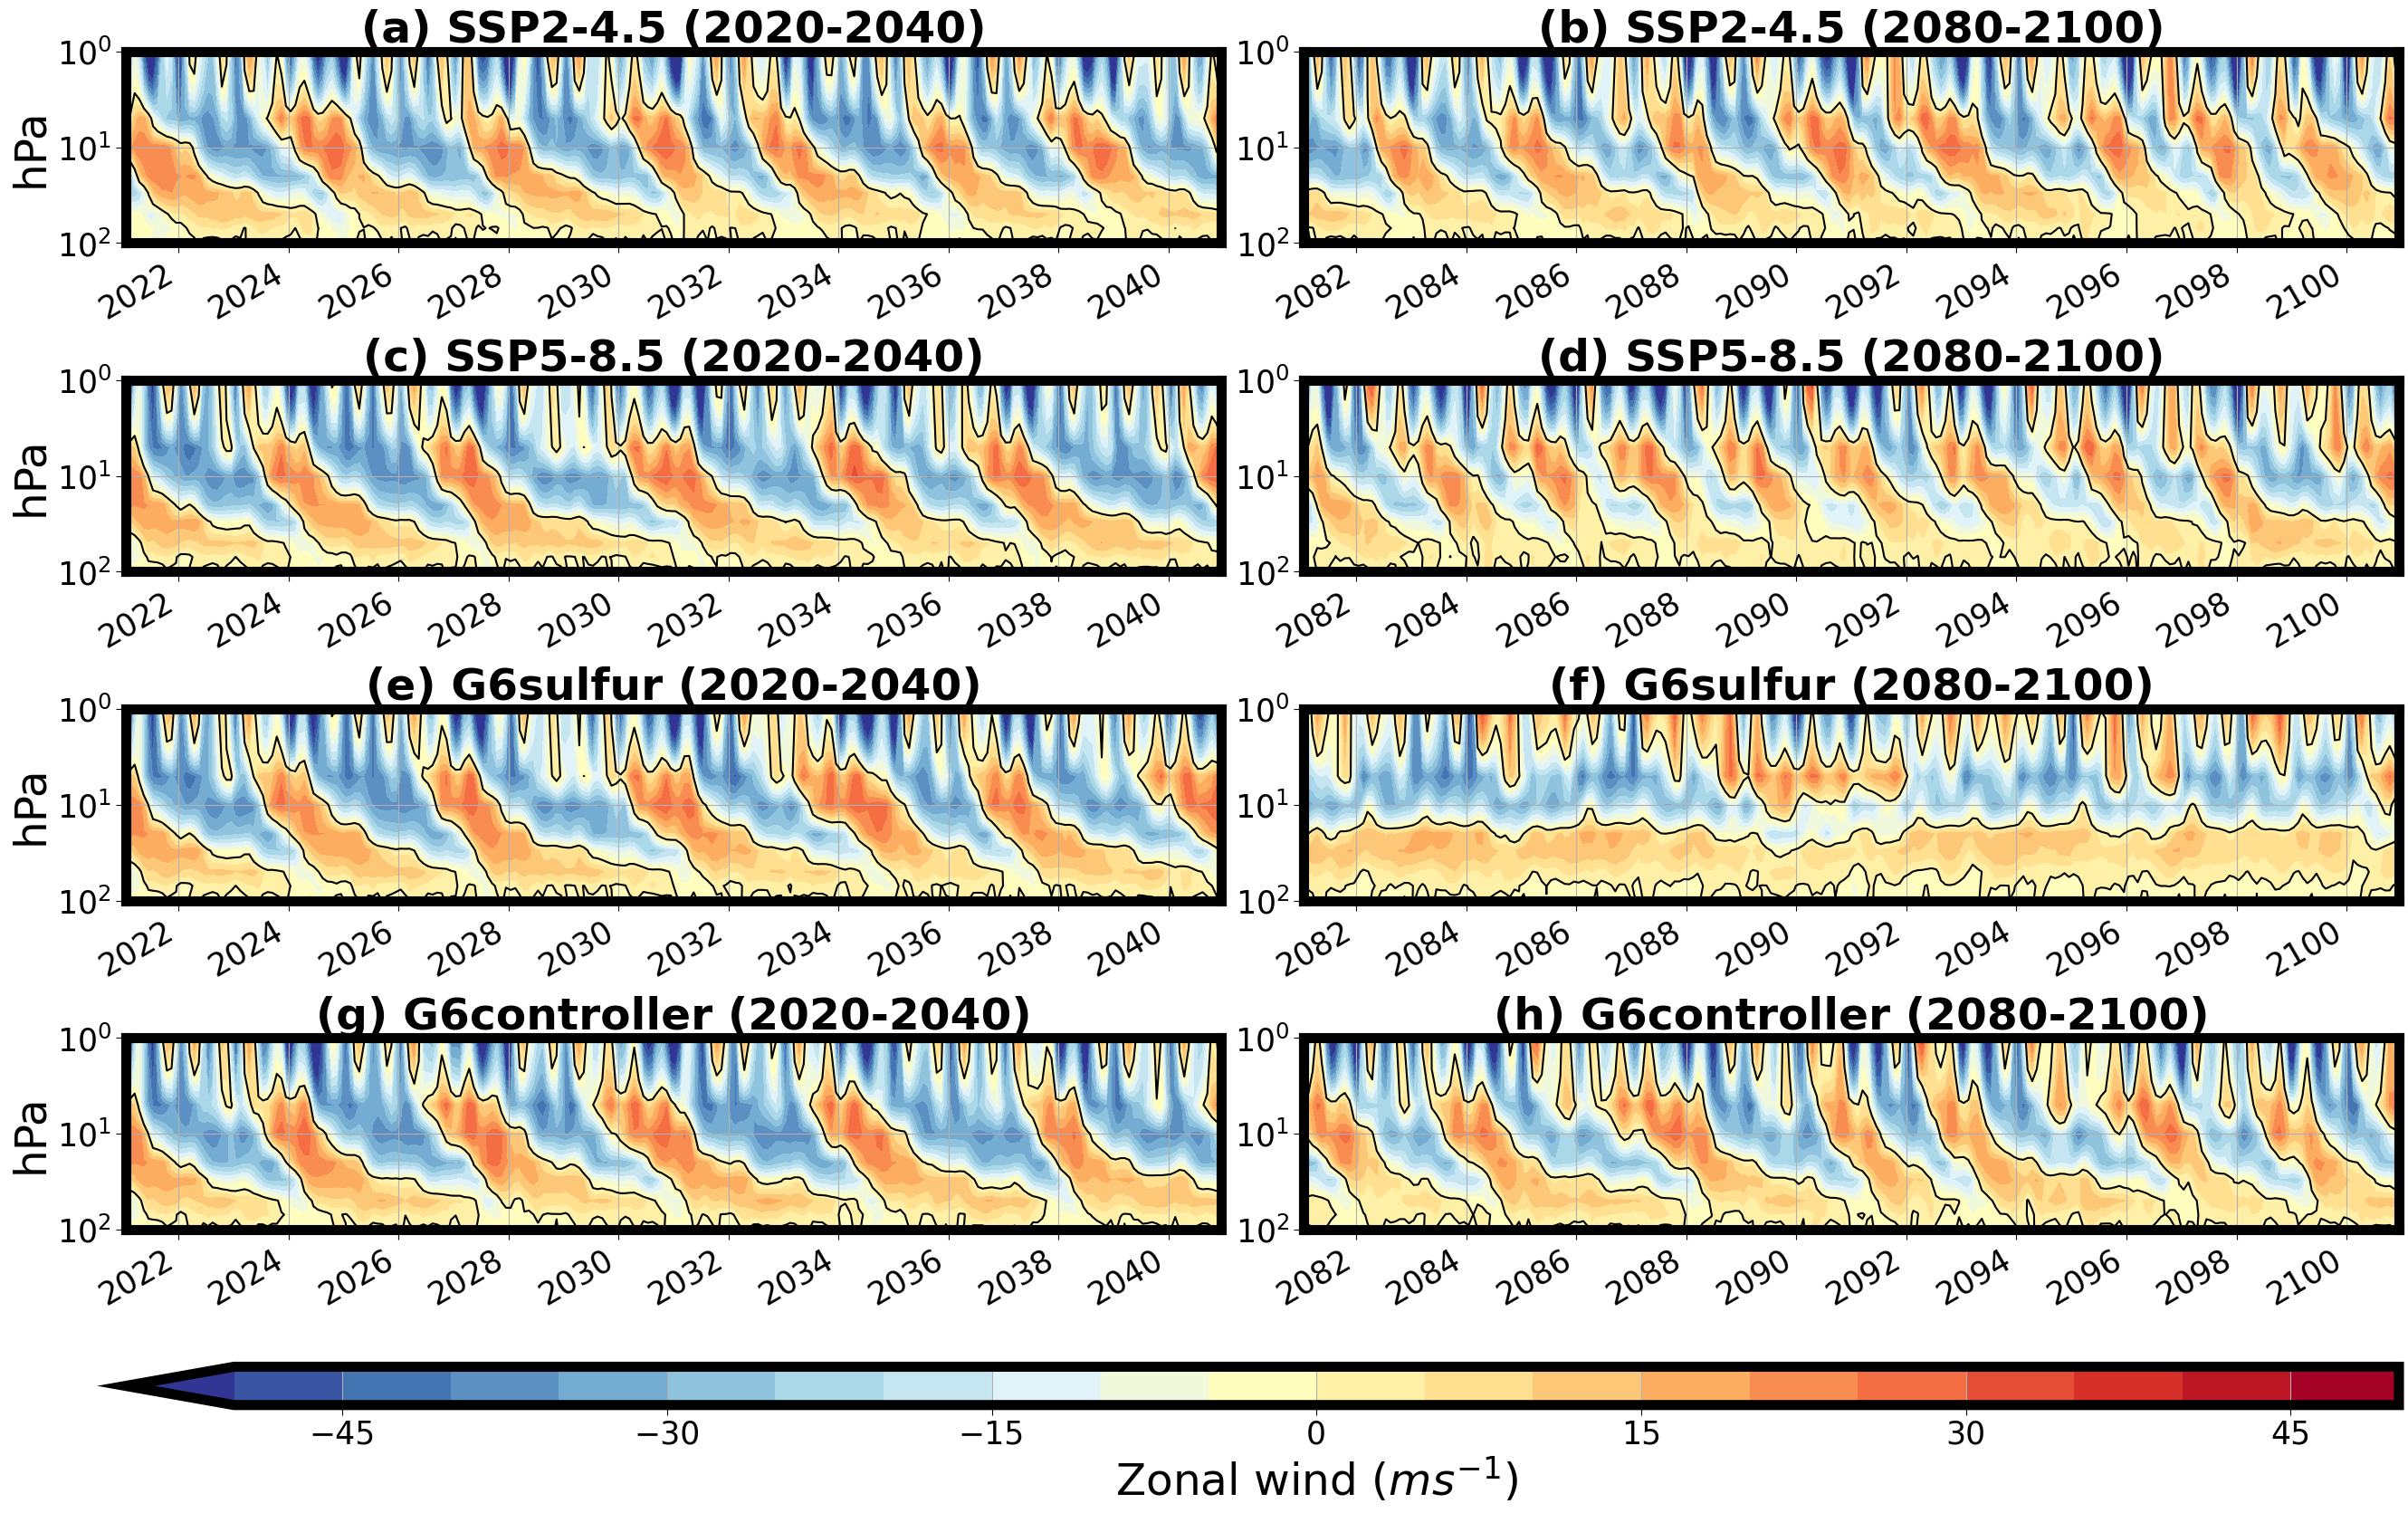

In [9]:
import nc_time_axis
nc_time_axis.DEFAULT_CFTIME = True


# Create colorbar levels
col_map = mpl_cm.get_cmap('RdYlBu_r')
lvs = np.linspace(-50, 50, 21)

fig = plt.figure(figsize=autosize_figure(4, 2, xscale_factor=2))
gs = GridSpec(5, 2, height_ratios=[10, 10, 10, 10, 2])

ax1 = fig.add_subplot(gs[0, 0])
ssp245_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
ssp245_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contour(levels=[0], colors='k')
ax1.invert_yaxis()
ax1.set_yscale('log')
ax1.set_ylim([100, 1])
plt.ylabel('hPa', fontsize = 35)
plt.xlabel('')
plt.title('(a) SSP2-4.5 (2020-2040)', fontweight='bold')

ax2 = fig.add_subplot(gs[1, 0])
ssp585_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
ssp585_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contour(levels=[0], colors='k')
ax2.invert_yaxis()
ax2.set_yscale('log')
ax2.set_ylim([100, 1])
plt.ylabel('hPa', fontsize = 35)
plt.xlabel('')
plt.title('(c) SSP5-8.5 (2020-2040)', fontweight='bold')

ax3 = fig.add_subplot(gs[2, 0])
g6sulf_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
g6sulf_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contour(levels=[0], colors='k')
ax3.invert_yaxis()
ax3.set_yscale('log')
ax3.set_ylim([100, 1])
plt.ylabel('hPa', fontsize = 35)
plt.xlabel('')
plt.title('(e) G6sulfur (2020-2040)', fontweight='bold')

ax4 = fig.add_subplot(gs[3, 0])
g6con_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
g6con_weighted_mean.sel(time=slice('2021', '2041')).transpose().plot.contour(levels=[0], colors='k')
ax4.invert_yaxis()
ax4.set_yscale('log')
ax4.set_ylim([100, 1])
plt.ylabel('hPa', fontsize = 35)
plt.xlabel('')
plt.title('(g) G6controller (2020-2040)', fontweight='bold')

ax5 = fig.add_subplot(gs[0, 1])
ssp245_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
ssp245_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contour(levels=[0], colors='k')
ax5.invert_yaxis()
ax5.set_yscale('log')
ax5.set_ylim([100, 1])
plt.ylabel('')
plt.xlabel('')
plt.title('(b) SSP2-4.5 (2080-2100)', fontweight='bold')

ax6 = fig.add_subplot(gs[1, 1])
ssp585_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
ssp585_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contour(levels=[0], colors='k')
ax6.invert_yaxis()
ax6.set_yscale('log')
ax6.set_ylim([100, 1])
plt.ylabel('')
plt.xlabel('')
plt.title('(d) SSP5-8.5 (2080-2100)', fontweight='bold')

ax7 = fig.add_subplot(gs[2, 1])
g6sulf_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
g6sulf_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contour(levels=[0], colors='k')
ax7.invert_yaxis()
ax7.set_yscale('log')
ax7.set_ylim([100, 1])
plt.ylabel('')
plt.xlabel('')
plt.title('(f) G6sulfur (2080-2100)', fontweight='bold')

ax8 = fig.add_subplot(gs[3, 1])
cb = g6con_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contourf(levels=lvs, cmap=col_map, add_colorbar=False)
g6con_weighted_mean.sel(time=slice('2081', '2101')).transpose().plot.contour(levels=[0], colors='k')
ax8.invert_yaxis()
ax8.set_yscale('log')
ax8.set_ylim([100, 1])
plt.ylabel('')
plt.xlabel('')
plt.title('(h) G6controller (2080-2100)', fontweight='bold')

ax9 = fig.add_subplot(gs[4, :])
col_bar = plt.colorbar(cb, cax=ax9, orientation='horizontal')
col_bar.set_label('Zonal wind ($ms^{-1}$)', fontsize = 35)

plt.tight_layout()
plt.savefig('/net/home/h05/awells/PycharmProjects/G6_comparison/Plots/Wells2023/Figure11.png', dpi=200)
plt.show()